# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [27]:
# Memuat dataset hasil clustering
file_path = '/content/drive/MyDrive/Dataset Clustering/hasil_clustering.csv'
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Dataset yang Dimuat:")
print(dataset.head())

Dataset yang Dimuat:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [28]:
# Drop unnecessary columns, ensuring the column names are correct
drop_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
# Check if these columns exist in dataset.columns before dropping
existing_columns = [col for col in drop_columns if col in dataset.columns]
dataset.drop(columns=existing_columns, inplace=True)

# Encode categorical features
label_encoders = {}
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

# Define features and target
X = dataset.drop(columns=['Cluster'])
y = dataset['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [29]:
# Membangun model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Membangun model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

=== Evaluasi KNN ===

Akurasi   : 0.92
F1-Score  : 0.92
Precision : 0.92
Recall    : 0.92

Laporan Klasifikasi KNN:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       204
           1       0.91      0.95      0.93       253

    accuracy                           0.92       457
   macro avg       0.92      0.92      0.92       457
weighted avg       0.92      0.92      0.92       457



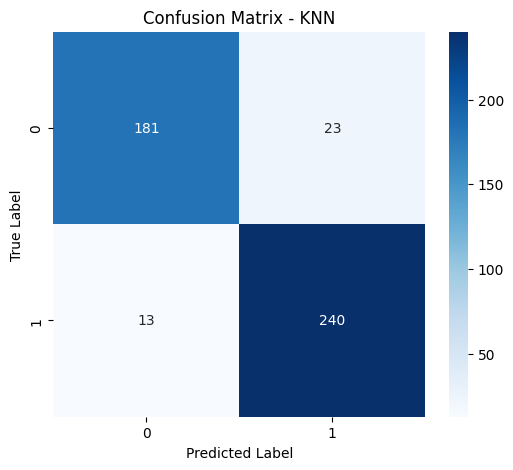

=== Evaluasi Naive Bayes ===

Akurasi   : 0.95
F1-Score  : 0.95
Precision : 0.96
Recall    : 0.95

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       204
           1       0.98      0.93      0.96       253

    accuracy                           0.95       457
   macro avg       0.95      0.96      0.95       457
weighted avg       0.96      0.95      0.95       457



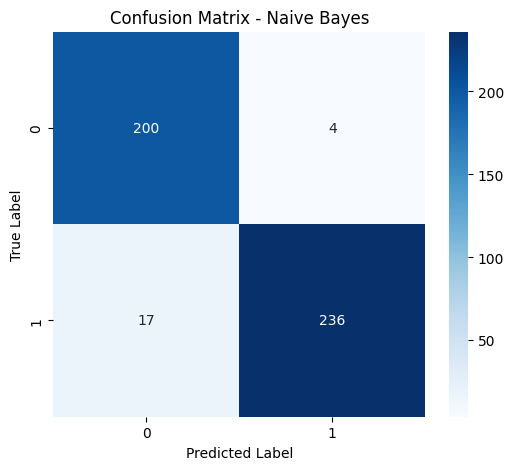

In [30]:
def evaluate_model(model, X_test, y_test, model_name):
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Tampilkan hasil evaluasi
    print(f"=== Evaluasi {model_name} ===\n")
    print(f"Akurasi   : {accuracy:.2f}")
    print(f"F1-Score  : {f1:.2f}")
    print(f"Precision : {precision:.2f}")
    print(f"Recall    : {recall:.2f}\n")

    # Tampilkan classification report
    print(f"Laporan Klasifikasi {model_name}:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Contoh penggunaan untuk model KNN dan Naive Bayes
evaluate_model(knn_model, X_test, y_test, "KNN")
evaluate_model(nb_model, X_test, y_test, "Naive Bayes")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

# **Analisis Hasil Evaluasi Model Klasifikasi**

## **1️⃣ Perbandingan Hasil Evaluasi: KNN vs Naive Bayes**

Saat ini kita menggunakan **K-Nearest Neighbors (KNN)** dan **Naive Bayes**, berikut hasil evaluasi model:

| Model            | Akurasi  | Precision (Avg) | Recall (Avg) | F1-Score (Avg) |
|------------------|----------|----------------|--------------|---------------|
| **KNN**         |  92%     |  92%           |  92%         |  92%          |
| **Naive Bayes** |  95%     |  96%           |  95%         |  95%          |

---

### **📌 KNN**
- **Kelas 0**  
  - **Precision** = 0.93 → **93% dari prediksi kelas 0 benar**.  
  - **Recall** = 0.89 → **89% dari semua kelas 0 berhasil dikenali dengan benar**.  

- **Kelas 1**  
  - **Precision** = 0.91 → **91% dari prediksi kelas 1 benar**.  
  - **Recall** = 0.95 → **95% dari semua kelas 1 berhasil dikenali dengan benar**.  

**Kesimpulan:**  
- **KNN memiliki performa yang baik**, dengan akurasi **92%** dan F1-score **92%**.  
- Namun, **recall pada kelas 0 lebih rendah**, yang berarti beberapa sampel kelas 0 masih salah diklasifikasikan.  
- **KNN bisa lebih sensitif terhadap jumlah tetangga (`n_neighbors`)**, jadi tuning lebih lanjut bisa meningkatkan performa.  

---

### **📌 Naive Bayes**
- **Kelas 0**  
  - **Precision** = 0.92 → **92% dari prediksi kelas 0 benar**.  
  - **Recall** = 0.98 → **98% dari semua kelas 0 berhasil dikenali dengan benar**.  

- **Kelas 1**  
  - **Precision** = 0.98 → **98% dari prediksi kelas 1 benar**.  
  - **Recall** = 0.93 → **93% dari semua kelas 1 berhasil dikenali dengan benar**.  

**Kesimpulan:**  
- **Naive Bayes memiliki akurasi lebih tinggi (95%) dibanding KNN (92%)**.  
- Model ini **lebih baik dalam mengenali kelas 0 (recall tinggi 98%)**, tetapi **lebih lemah dalam mengenali kelas 1 dibanding KNN**.  
- **Naive Bayes lebih cocok untuk data dengan fitur independen**, dan hasilnya menunjukkan model ini **lebih stabil dibandingkan KNN**.  

---

## **2️⃣ Apakah Model Mengalami Overfitting atau Underfitting?**
- **KNN**   
  - Bisa mengalami **overfitting** jika jumlah tetangga terlalu kecil (`n_neighbors` rendah).  
  - **Tuning hyperparameter** bisa meningkatkan performa lebih lanjut.  

- **Naive Bayes**  
  - Tidak menunjukkan tanda **overfitting**, karena model ini berbasis probabilitas.  
  - Model ini **cukup generalisasi**, tetapi bisa kurang akurat jika fitur tidak benar-benar independen.  

---

## **3️⃣ Rekomendasi Tindakan Lanjutan**
✅ **Gunakan Naive Bayes sebagai model utama**, karena memiliki akurasi dan stabilitas lebih tinggi dibanding KNN.  

Jika ingin meningkatkan hasil lebih lanjut:  
1. **Tuning Hyperparameter**  
   - **KNN**: Coba variasikan **`n_neighbors`**, gunakan **Grid Search** untuk menemukan parameter terbaik.  
   - **Naive Bayes**: Bisa mencoba **MultinomialNB atau BernoulliNB** jika dataset lebih cocok.  

2. **Feature Engineering**  
   - Bisa mencoba **normalisasi data** untuk membantu KNN bekerja lebih baik.  
   - Coba **reduksi dimensi (PCA)** untuk melihat apakah model lebih stabil.  

3. **Coba Algoritma Lain**  
   - **Random Forest atau SVM** bisa dicoba untuk melihat apakah ada peningkatan performa lebih lanjut.  
